In [1]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        pred=np.zeros((x.shape[0], 1))
        print(pred.shape)
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for f in features:
        le=LabelEncoder()
        le.fit(df[f])
        df[f]=le.transform(df[f])
    return df


#null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#불필요한  feature 제거 함수
def drop_feature(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = encode_features(df)
    return df

df=pd.read_csv('titanic_train.csv')
y_df = df['Survived']
x_df = df.drop('Survived', axis=1)
x_df = transform_features(x_df)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_df,y_df,test_size=0.2, random_state=11 )


In [3]:
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)
pred = myclf.predict(x_test)
print(f'accuracy_score(y_test, pred):{accuracy_score(y_test, pred)}')

(179, 1)
accuracy_score(y_test, pred):0.8324022346368715



## 오차행렬, Precision  Recall

In [4]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
df = pd.read_csv('./titanic_train.csv')
y_df = df['Survived']
X_df= df.drop('Survived', axis=1)
X_df = transform_features(X_df)

x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(x_train , y_train)
pred = lr_clf.predict(x_test)
print(f'type(pred) : {type(pred)},\n pred[:3] : {pred[:3]}')
print(f'type(y_test) : {type(y_test)},\n y_test.value_counts() :\n{y_test.value_counts()}')
get_clf_eval(y_test , pred)

type(pred) : <class 'numpy.ndarray'>,
 pred[:3] : [1 0 0]
type(y_test) : <class 'pandas.core.series.Series'>,
 y_test.value_counts() :
0    118
1     61
Name: Survived, dtype: int64
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



## Trade Off 

In [6]:
pred_proba = lr_clf.predict_proba(x_test) # ndarray m X n # n 2진분류의 0(negative), 1(positive)확률
pred  = lr_clf.predict(x_test) # 0 or 1의 값을 취하는 것
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [7]:
from sklearn.preprocessing import Binarizer
x = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [8]:
from sklearn.preprocessing import Binarizer
custom_threshold = 0.5
print(f'pred_proba[:3] : \n{pred_proba[:3]}') # negative, positive
print(f'pred_proba[:,1][:3] : \n{pred_proba[:,1][:3]}') # positive 
pred_proba_1 = pred_proba[:, 1].reshape(-1,1) #positive
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
print(f'custom_predict[:3] :\n{custom_predict[:3]}')
print(f'y_test[:3]: \n{y_test[:3]}')

get_clf_eval(y_test, custom_predict)

pred_proba[:3] : 
[[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
pred_proba[:,1][:3] : 
[0.55064773 0.13664488 0.13570355]
custom_predict[:3] :
[[1.]
 [0.]
 [0.]]
y_test[:3]: 
431    1
821    1
629    0
Name: Survived, dtype: int64
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [11]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print(f'custom_threshold : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

custom_threshold : 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
custom_threshold : 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
custom_threshold : 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
custom_threshold : 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
custom_threshold : 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [13]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] #positive

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(f'thresholds.shape : {thresholds.shape}')

thr_index = np.arange(0, thresholds.shape[0], 15)
print(f'thr_index : {thr_index}')
print(f'np.round(thresholds[thr_index], 2) : \n{np.round(thresholds[thr_index], 2)}')
print(f'np.round(precisions[thr_index], 3) : \n{np.round(precisions[thr_index], 3)}')
print(f'np.round(recalls[thr_index], 3) : \n{np.round(recalls[thr_index], 3)}')


thresholds.shape : (147,)
thr_index : [  0  15  30  45  60  75  90 105 120 135]
np.round(thresholds[thr_index], 2) : 
[0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
np.round(precisions[thr_index], 3) : 
[0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
np.round(recalls[thr_index], 3) : 
[1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


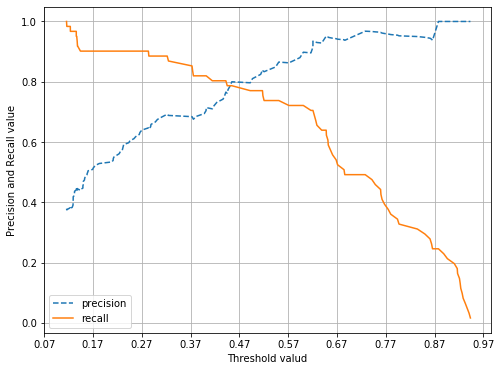

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold valud');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

    


## F1 score (precision + recall)

In [17]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f'f1 : {f1:.4f}')

f1 : 0.7966


In [18]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}'.format(accuracy , precision ,recall,f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

custom_threshold : 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1 : 0.7576
custom_threshold : 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1 : 0.7869
custom_threshold : 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1 : 0.7966
custom_threshold : 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1 : 0.7965
custom_threshold : 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1 : 0.8000



## ROC(Receiver Operation Characteristic Curve : 수신자판단) 곡선과 AUC
### FPR -  TPR(재현율,민감도) 곡선   cf) TNR(특이성)

In [20]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값:  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임곗값별 TPR:  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


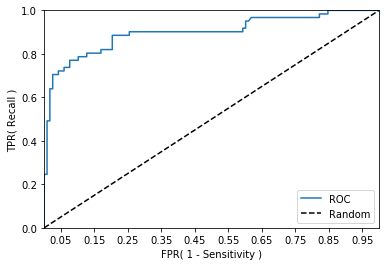

In [21]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1] )

In [22]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(x_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8429


In [23]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))